In [1]:
library("xgboost")
library("Matrix")
library('Ckmeans.1d.dp')
library('lightgbm')



Attaching package: ‘lightgbm’


The following object is masked from ‘package:xgboost’:

    slice




## Read data and process data labels

In [2]:
time_matrix <- matrix(0,ncol = 3, nrow =4)
colnames(time_matrix) <- c("user_time", "system_time", "elapsed_time")
start_time = Sys.time()

In [3]:
data=read.csv('Yearly_features_matrix.csv')
data=data[,2:(dim(data)[2]-6)]

In [4]:
dim(data)

[1] 23000    17

In [5]:
head(data)

,frequency,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,length
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,1,0.9903832,1.535759e-07,5.174030,-0.94405361,0.47491778,0.6782989,0.3751645,0.9361374,3.2285135,0.39993885,0.28707837,-0.1820491,0.22316867,31
2,1,0,1,0.7455956,1.919834e-04,-2.797630,2.13419228,0.27486845,0.4580795,0.8010614,0.7084840,0.8208482,0.12753274,0.22214291,-0.3185895,0.37163112,31
3,1,0,1,0.9993711,1.038094e-09,5.497375,-0.01972653,0.20035534,0.4491332,0.3055037,0.8966488,2.9734257,-0.17814744,0.37277176,-0.6280637,1.00110959,31
4,1,0,1,0.9991043,5.484677e-09,5.514672,-0.12400209,-0.18881555,0.3260450,0.3087948,0.8904246,2.8852573,-0.45891796,0.60342537,-0.7758825,1.24511944,31
5,1,0,1,0.9941526,1.000137e-07,5.421624,0.72042474,0.15921568,0.4025341,0.3435267,0.8685223,2.4451391,0.02494266,0.16237458,-0.5492186,0.61790122,31
6,1,0,1,0.9642112,2.683180e-05,4.078327,0.73445937,0.02824047,0.1412002,0.5294464,0.7107351,1.3317587,0.22505892,0.08313085,0.1296658,0.09734006,19


In [6]:
dlist= load('year_ets_datalist.RData')
datalist=eval(parse(text = dlist ))
res=datalist[[1]]
MASE=res[,,,6]
m=5

In [7]:
dim(MASE)

[1] 23000     5     4

In [8]:
whichmin<-function(x){
    minx=min(x[x>0])
    loc=which(x==minx)[1]-1
    loc
}

meanunique=function(x)
    {
    mean(unique(x))
}

In [9]:
nanum=c()
for(i in seq(1,dim(MASE)[1]))
    {
    count=MASE[i,,]
    a=apply(count,1,min)
    if(sum(is.na(a))>0)
        {
        nanum=append(nanum,i)
    }
    }

In [10]:
nanum

NULL

In [11]:
realbestmin=matrix(0,dim(MASE)[1],1)
for(i in seq(1,dim(MASE)[1]))
    {
    count=MASE[i,,]
    min_value=apply(count,1,min)
    if (max(min_value,na.rm = TRUE)==0){
        realbestmin[i,]=0
        }
    else
        {
        min_value[is.na(min_value)]=100 
        realbestmin[i,]= whichmin(min_value)
    }
    }

In [12]:
table(realbestmin)

realbestmin
    0     1     2     3     4 
 3006  2393  2940  4290 10371 

In [13]:
realbestmean=matrix(0,dim(MASE)[1],1)
for(i in seq(1,dim(MASE)[1]))
    {
    count=MASE[i,,]
    mean_value=apply(count,1,meanunique)
    if (max(mean_value,na.rm = TRUE)==0){
        realbestmean[i,]=0
        }
    else
        {
        mean_value[is.na(mean_value)]=100 
        realbestmean[i,]= whichmin(mean_value)
    }
    }

In [14]:
realbestmean

3
2
1
3
2
3
3
1
2
3
0


In [15]:
head(data)

,frequency,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,length
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,1,0.9903832,1.535759e-07,5.174030,-0.94405361,0.47491778,0.6782989,0.3751645,0.9361374,3.2285135,0.39993885,0.28707837,-0.1820491,0.22316867,31
2,1,0,1,0.7455956,1.919834e-04,-2.797630,2.13419228,0.27486845,0.4580795,0.8010614,0.7084840,0.8208482,0.12753274,0.22214291,-0.3185895,0.37163112,31
3,1,0,1,0.9993711,1.038094e-09,5.497375,-0.01972653,0.20035534,0.4491332,0.3055037,0.8966488,2.9734257,-0.17814744,0.37277176,-0.6280637,1.00110959,31
4,1,0,1,0.9991043,5.484677e-09,5.514672,-0.12400209,-0.18881555,0.3260450,0.3087948,0.8904246,2.8852573,-0.45891796,0.60342537,-0.7758825,1.24511944,31
5,1,0,1,0.9941526,1.000137e-07,5.421624,0.72042474,0.15921568,0.4025341,0.3435267,0.8685223,2.4451391,0.02494266,0.16237458,-0.5492186,0.61790122,31
6,1,0,1,0.9642112,2.683180e-05,4.078327,0.73445937,0.02824047,0.1412002,0.5294464,0.7107351,1.3317587,0.22505892,0.08313085,0.1296658,0.09734006,19


In [16]:
set.seed(100)
index = sample(2,nrow(data),replace = TRUE,prob=c(0.7,0.3))

In [17]:
train_data=data[index==1,]
test_data=data[index==2,]
train_label_min=realbestmin[index==1,]
test_label_min=realbestmin[index==2,]
train_label_mean=realbestmean[index==1,]
test_label_mean=realbestmean[index==2,]

In [18]:
head(train_data)

,frequency,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,length
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,1,0.9903832,1.535759e-07,5.174030,-0.94405361,0.47491778,0.6782989,0.3751645,0.9361374,3.2285135,0.39993885,0.28707837,-0.1820491,0.22316867,31
2,1,0,1,0.7455956,1.919834e-04,-2.797630,2.13419228,0.27486845,0.4580795,0.8010614,0.7084840,0.8208482,0.12753274,0.22214291,-0.3185895,0.37163112,31
3,1,0,1,0.9993711,1.038094e-09,5.497375,-0.01972653,0.20035534,0.4491332,0.3055037,0.8966488,2.9734257,-0.17814744,0.37277176,-0.6280637,1.00110959,31
4,1,0,1,0.9991043,5.484677e-09,5.514672,-0.12400209,-0.18881555,0.3260450,0.3087948,0.8904246,2.8852573,-0.45891796,0.60342537,-0.7758825,1.24511944,31
5,1,0,1,0.9941526,1.000137e-07,5.421624,0.72042474,0.15921568,0.4025341,0.3435267,0.8685223,2.4451391,0.02494266,0.16237458,-0.5492186,0.61790122,31
6,1,0,1,0.9642112,2.683180e-05,4.078327,0.73445937,0.02824047,0.1412002,0.5294464,0.7107351,1.3317587,0.22505892,0.08313085,0.1296658,0.09734006,19


In [19]:
end_time = Sys.time()

In [20]:
time_matrix[1,]=end_time-start_time

In [21]:
end_time-start_time

Time difference of 13.78069 secs

## Target the interval where the actual error is minimum

In [22]:
start_time = Sys.time()

In [23]:
dtrain_xg_min_reg <- xgb.DMatrix(data = as.matrix(train_data),label = as.matrix(train_label_min)) 
dtrain_xg_min_cl <- xgb.DMatrix(data = as.matrix(train_data),label = as.matrix(as.factor(train_label_min)) )

In [24]:
dtrain_lg_min_reg <- lgb.Dataset(data = as.matrix(train_data),label = as.matrix(train_label_min))
dtrain_lg_min_cl <- lgb.Dataset(data = as.matrix(train_data),label = as.matrix(as.factor(train_label_min)))

In [25]:
xgb_min_reg <- xgboost(data = dtrain_xg_min_reg, nround=100)

[1]	train-rmse:2.080062 
[2]	train-rmse:1.728986 
[3]	train-rmse:1.520007 
[4]	train-rmse:1.401684 
[5]	train-rmse:1.333479 
[6]	train-rmse:1.295280 
[7]	train-rmse:1.272802 
[8]	train-rmse:1.255832 
[9]	train-rmse:1.244932 
[10]	train-rmse:1.237046 
[11]	train-rmse:1.226539 
[12]	train-rmse:1.220129 
[13]	train-rmse:1.212512 
[14]	train-rmse:1.208134 
[15]	train-rmse:1.202158 
[16]	train-rmse:1.193539 
[17]	train-rmse:1.186366 
[18]	train-rmse:1.178000 
[19]	train-rmse:1.171916 
[20]	train-rmse:1.168760 
[21]	train-rmse:1.162234 
[22]	train-rmse:1.159995 
[23]	train-rmse:1.157232 
[24]	train-rmse:1.154217 
[25]	train-rmse:1.149527 
[26]	train-rmse:1.147900 
[27]	train-rmse:1.144422 
[28]	train-rmse:1.138368 
[29]	train-rmse:1.135548 
[30]	train-rmse:1.129739 
[31]	train-rmse:1.124170 
[32]	train-rmse:1.122460 
[33]	train-rmse:1.117306 
[34]	train-rmse:1.116149 
[35]	train-rmse:1.110846 
[36]	train-rmse:1.107860 
[37]	train-rmse:1.103142 
[38]	train-rmse:1.097861 
[39]	train-rmse:1.093

In [26]:
xgb_min_cl <- xgboost(data = dtrain_xg_min_cl, nround=100, objective='multi:softmax',num_class=5)

[1]	train-mlogloss:1.481160 
[2]	train-mlogloss:1.399538 
[3]	train-mlogloss:1.343229 
[4]	train-mlogloss:1.299382 
[5]	train-mlogloss:1.264843 
[6]	train-mlogloss:1.238884 
[7]	train-mlogloss:1.215107 
[8]	train-mlogloss:1.195849 
[9]	train-mlogloss:1.180618 
[10]	train-mlogloss:1.165852 
[11]	train-mlogloss:1.150264 
[12]	train-mlogloss:1.137125 
[13]	train-mlogloss:1.127860 
[14]	train-mlogloss:1.117646 
[15]	train-mlogloss:1.108578 
[16]	train-mlogloss:1.099110 
[17]	train-mlogloss:1.089211 
[18]	train-mlogloss:1.082087 
[19]	train-mlogloss:1.074384 
[20]	train-mlogloss:1.066274 
[21]	train-mlogloss:1.060916 
[22]	train-mlogloss:1.054199 
[23]	train-mlogloss:1.047046 
[24]	train-mlogloss:1.039803 
[25]	train-mlogloss:1.032442 
[26]	train-mlogloss:1.026172 
[27]	train-mlogloss:1.019194 
[28]	train-mlogloss:1.014684 
[29]	train-mlogloss:1.010067 
[30]	train-mlogloss:1.004455 
[31]	train-mlogloss:0.994601 
[32]	train-mlogloss:0.990582 
[33]	train-mlogloss:0.984186 
[34]	train-mlogloss

In [27]:
lgb_min_reg <- lgb.train(data = dtrain_lg_min_reg, nrounds = 100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3402
[LightGBM] [Info] Number of data points in the train set: 16214, number of used features: 14
[LightGBM] [Info] Start training from score 2.720859


In [28]:
params <- list(objective = "multiclass",
               num_class = 5, 
               metric = "multi_logloss")
lgb_min_cl <- lgb.train(data = dtrain_lg_min_cl,nrounds = 100,params=params)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3402
[LightGBM] [Info] Number of data points in the train set: 16214, number of used features: 14
[LightGBM] [Info] Start training from score -2.035403
[LightGBM] [Info] Start training from score -2.256424
[LightGBM] [Info] Start training from score -2.062684
[LightGBM] [Info] Start training from score -1.670078
[LightGBM] [Info] Start training from score -0.800058


In [29]:
end_time = Sys.time()
time_matrix[2,]=end_time-start_time

## Target the interval where the average error is minimum

In [30]:
start_time = Sys.time()

In [31]:
dtrain_xg_mean_reg <- xgb.DMatrix(data = as.matrix(train_data),label = as.matrix(train_label_mean)) 
dtrain_xg_mean_cl <- xgb.DMatrix(data = as.matrix(train_data),label = as.matrix(as.factor(train_label_mean)) )

In [32]:
dtrain_lg_mean_reg <- lgb.Dataset(data = as.matrix(train_data),label = as.matrix(train_label_mean))
dtrain_lg_mean_cl <- lgb.Dataset(data = as.matrix(train_data),label = as.matrix(as.factor(train_label_mean)))

In [33]:
xgb_mean_reg <- xgboost(data = dtrain_xg_mean_reg, nround=100)

[1]	train-rmse:1.844590 
[2]	train-rmse:1.587225 
[3]	train-rmse:1.438449 
[4]	train-rmse:1.354654 
[5]	train-rmse:1.306050 
[6]	train-rmse:1.278351 
[7]	train-rmse:1.258313 
[8]	train-rmse:1.245596 
[9]	train-rmse:1.236447 
[10]	train-rmse:1.228776 
[11]	train-rmse:1.224204 
[12]	train-rmse:1.217147 
[13]	train-rmse:1.209718 
[14]	train-rmse:1.201985 
[15]	train-rmse:1.199597 
[16]	train-rmse:1.196201 
[17]	train-rmse:1.191296 
[18]	train-rmse:1.183036 
[19]	train-rmse:1.175852 
[20]	train-rmse:1.172704 
[21]	train-rmse:1.168555 
[22]	train-rmse:1.165362 
[23]	train-rmse:1.158907 
[24]	train-rmse:1.152846 
[25]	train-rmse:1.147923 
[26]	train-rmse:1.145037 
[27]	train-rmse:1.141480 
[28]	train-rmse:1.134316 
[29]	train-rmse:1.130566 
[30]	train-rmse:1.126135 
[31]	train-rmse:1.118009 
[32]	train-rmse:1.114104 
[33]	train-rmse:1.110916 
[34]	train-rmse:1.105922 
[35]	train-rmse:1.099763 
[36]	train-rmse:1.094279 
[37]	train-rmse:1.090976 
[38]	train-rmse:1.086891 
[39]	train-rmse:1.081

In [34]:
xgb_mean_cl <- xgboost(data = dtrain_xg_mean_cl, nround=100, objective='multi:softmax',num_class=5)

[1]	train-mlogloss:1.540413 
[2]	train-mlogloss:1.490745 
[3]	train-mlogloss:1.452892 
[4]	train-mlogloss:1.422169 
[5]	train-mlogloss:1.395144 
[6]	train-mlogloss:1.373651 
[7]	train-mlogloss:1.354586 
[8]	train-mlogloss:1.336068 
[9]	train-mlogloss:1.322319 
[10]	train-mlogloss:1.306574 
[11]	train-mlogloss:1.294771 
[12]	train-mlogloss:1.281422 
[13]	train-mlogloss:1.266627 
[14]	train-mlogloss:1.257557 
[15]	train-mlogloss:1.248310 
[16]	train-mlogloss:1.236215 
[17]	train-mlogloss:1.225866 
[18]	train-mlogloss:1.219153 
[19]	train-mlogloss:1.212901 
[20]	train-mlogloss:1.205428 
[21]	train-mlogloss:1.196627 
[22]	train-mlogloss:1.191866 
[23]	train-mlogloss:1.184839 
[24]	train-mlogloss:1.176312 
[25]	train-mlogloss:1.169097 
[26]	train-mlogloss:1.163829 
[27]	train-mlogloss:1.158526 
[28]	train-mlogloss:1.152169 
[29]	train-mlogloss:1.145320 
[30]	train-mlogloss:1.139389 
[31]	train-mlogloss:1.133979 
[32]	train-mlogloss:1.128330 
[33]	train-mlogloss:1.120401 
[34]	train-mlogloss

In [35]:
lgb_mean_reg <- lgb.train(data = dtrain_lg_mean_reg,nrounds = 100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3402
[LightGBM] [Info] Number of data points in the train set: 16214, number of used features: 14
[LightGBM] [Info] Start training from score 2.256753


In [ ]:
params <- list(objective = "multiclass",
               num_class = 5, 
               metric = "multi_logloss")
lgb_mean_cl <- lgb.train(data = dtrain_lg_mean_cl,params=params,nrounds = 100)

In [ ]:
end_time = Sys.time()
time_matrix[3,]=end_time-start_time

In [ ]:
end_time-start_time

## predict

In [ ]:
start_time = Sys.time()

In [ ]:
alldatalgb <- lgb.Dataset(data = as.matrix(data))
alldataxgb <- xgb.DMatrix(data = as.matrix(data))


In [ ]:
xgbregmin=predict(xgb_min_reg,alldataxgb)
xgbclsmin=predict(xgb_min_cl,alldataxgb)
lgbregmin=predict(lgb_min_reg,as.matrix(data))
lgbclsmin=predict(lgb_min_cl,as.matrix(data))

In [ ]:
xgbregmin

In [ ]:
xgbclsmin

In [ ]:
lgbregmin

In [ ]:
lgbclsmin

In [ ]:
datalength=dim(data)[1]
lgbclsm=matrix(lgbclsmin,m,datalength)
lgbclsminr=matrix(0,datalength,1)
for(i in 1:datalength)
    {
    lgbclsminr[i,]=which.max(lgbclsm[,i])
}
lgbclsminr=lgbclsminr-1

In [ ]:
lgbclsminr

In [ ]:
xgbregmean=predict(xgb_mean_reg,alldataxgb)
xgbclsmean=predict(xgb_mean_cl,alldataxgb)
lgbregmean=predict(lgb_mean_reg,as.matrix(data))
lgbclsmean=predict(lgb_mean_cl,as.matrix(data))

In [ ]:
lgbclsm=matrix(lgbclsmean,m,datalength)
lgbclsmeanr=matrix(0,datalength,1)
for(i in 1:datalength)
    {
    lgbclsmeanr[i,]=which.max(lgbclsm[,i])
}
lgbclsmeanr=lgbclsmeanr-1

In [ ]:
preallmin=cbind(xgbclsmin,xgbregmin)
preallmin=cbind(preallmin,lgbclsminr)
preallmin=cbind(preallmin,lgbregmin)

In [ ]:
colnames(preallmin)=c('xgbclsmin','xgbregmin','lgbclsmin','lgbregmin')
head(preallmin)

In [ ]:
preallmean=cbind(xgbclsmean,xgbregmean)
preallmean=cbind(preallmean,lgbclsmeanr)
preallmean=cbind(preallmean,lgbregmean)

In [ ]:
head(preallmean)

In [ ]:
colnames(preallmean)=c('xgbclsmean','xgbregmean','lgbclsmean','lgbregmean')
head(preallmean)

In [ ]:
end_time = Sys.time()
time_matrix[4,]=end_time-start_time

In [ ]:
result_list=list(preallmin,preallmean,time_matrix)

In [58]:
save(result_list, file = "yearly_ets_opt_pre_result.RData")

In [56]:
time_matrix

user_time,system_time,elapsed_time
7.950534,7.950534,7.950534
11.780916,11.780916,11.780916
11.167580,11.167580,11.167580
1.693042,1.693042,1.693042


## importance

In [ ]:
# Gain: 这是每个特征在模型中所有树上的平均增益。增益可以理解为该特征在模型中的贡献度，增益越大，说明该特征对模型的贡献越大。
# Cover: 这是每个特征在模型中所有树上的平均覆盖度。覆盖度可以理解为该特征在模型中的使用频率，覆盖度越大，说明该特征在模型中被使用的次数越多。
# Frequency: 这是每个特征在模型中所有树上的平均频率。频率可以理解为该特征在模型中的出现频率，频率越大，说明该特征在模型中出现的次数越多。

In [60]:
# 计算特征重要性
importance_matrix <- xgb.importance(model = xgb_min_cl)

# 打印特征重要性
print(importance_matrix)


        Feature       Gain      Cover  Frequency
         <char>      <num>      <num>      <num>
 1:   curvature 0.13318866 0.10003757 0.08679146
 2:   linearity 0.10816336 0.08745799 0.07334564
 3:     x_acf10 0.07643827 0.08413122 0.06448721
 4:      x_acf1 0.06865129 0.06205065 0.06469813
 5: diff2_acf10 0.06106761 0.05963037 0.07387292
 6:       trend 0.05924920 0.05745629 0.06380174
 7:     entropy 0.05901644 0.06373588 0.06791458
 8:   user_time 0.05897418 0.07312100 0.07798576
 9:     e_acf10 0.05805579 0.05770081 0.06759821
10:  diff2_acf1 0.05758011 0.06578198 0.06870551
11:      e_acf1 0.05691593 0.07394342 0.06875824
12:  diff1_acf1 0.05648173 0.06027870 0.06332718
13: diff1_acf10 0.05516211 0.05574804 0.06733456
14:       spike 0.05135071 0.05784317 0.05531242
15:      length 0.03970460 0.04108290 0.03606644


In [57]:
# 计算特征重要性
importance_matrix <- xgb.importance(model = xgb_min_reg)

# 打印特征重要性
print(importance_matrix)

        Feature       Gain      Cover  Frequency
         <char>      <num>      <num>      <num>
 1:   curvature 0.18860844 0.09051332 0.10871816
 2:   linearity 0.15162438 0.09331548 0.08718161
 3:     x_acf10 0.06675630 0.07846791 0.06171050
 4:       trend 0.06659397 0.05555134 0.12031476
 5:      x_acf1 0.06544501 0.08924170 0.06626631
 6:     entropy 0.05693773 0.09035364 0.07413543
 7:       spike 0.05406016 0.06724694 0.06481673
 8: diff1_acf10 0.05391065 0.05436043 0.06357424
 9:      e_acf1 0.05389462 0.08325550 0.07185753
10:  diff1_acf1 0.05219029 0.06399349 0.05819010
11:  diff2_acf1 0.05215548 0.06749896 0.06626631
12: diff2_acf10 0.05067173 0.06226543 0.06191758
13:     e_acf10 0.04816695 0.06482431 0.06253883
14:      length 0.03898430 0.03911154 0.03251191


In [63]:
# 计算特征重要性
importance_matrix <- xgb.importance(model = xgb_mean_cl)

# 打印特征重要性
print(importance_matrix)

        Feature       Gain      Cover  Frequency
         <char>      <num>      <num>      <num>
 1:   curvature 0.12833812 0.09826938 0.08728230
 2:   linearity 0.10164834 0.07681244 0.07401782
 3:     x_acf10 0.07079384 0.07584538 0.06176590
 4:       trend 0.06511468 0.08222895 0.06515796
 5:      x_acf1 0.06372492 0.05533673 0.06409478
 6:   user_time 0.06280081 0.06704799 0.07958688
 7:  diff1_acf1 0.06216348 0.06096145 0.06303159
 8:  diff2_acf1 0.05945629 0.06737611 0.07072701
 9:     e_acf10 0.05880526 0.06684876 0.07006885
10: diff2_acf10 0.05768665 0.06487358 0.07087890
11: diff1_acf10 0.05698151 0.05802642 0.06875253
12:     entropy 0.05655583 0.05105503 0.06652491
13:      e_acf1 0.05623807 0.06661422 0.06561361
14:       spike 0.04986320 0.06170801 0.05371608
15:      length 0.04982903 0.04699554 0.03878088


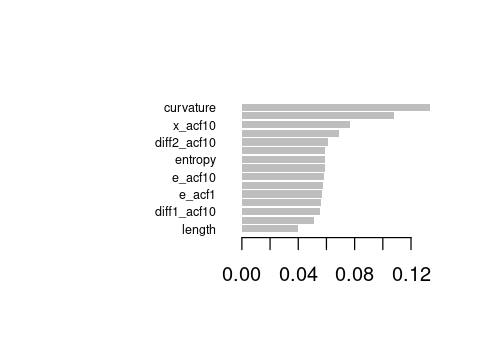

In [61]:
# 绘制特征重要性柱状图
xgb.plot.importance(importance_matrix)

In [66]:
# 获取特征重要性
importance_matrix <- lgb.importance(lgb_min_reg)

# 打印特征重要性
print(importance_matrix)

        Feature       Gain      Cover  Frequency
         <char>      <num>      <num>      <num>
 1:   curvature 0.23525248 0.11567433 0.09200000
 2:   linearity 0.19186341 0.12701357 0.09766667
 3:      x_acf1 0.06500342 0.08152034 0.07933333
 4:       trend 0.06398674 0.04913359 0.06200000
 5:     x_acf10 0.05916298 0.06812408 0.07000000
 6:      length 0.05167904 0.09383865 0.06433333
 7:       spike 0.04275358 0.08060753 0.06200000
 8:  diff1_acf1 0.04143776 0.05521600 0.06133333
 9:     e_acf10 0.04038082 0.04803286 0.06433333
10:      e_acf1 0.03730754 0.08505729 0.06300000
11: diff2_acf10 0.03664839 0.03442293 0.05500000
12: diff1_acf10 0.03530267 0.04259717 0.05466667
13:  diff2_acf1 0.03504037 0.04893156 0.05800000
14:     entropy 0.03375639 0.04140714 0.05733333
15:   user_time 0.03042444 0.02842296 0.05900000


In [67]:
# 获取特征重要性
importance_matrix <- lgb.importance(lgb_mean_reg)

# 打印特征重要性
print(importance_matrix)

        Feature       Gain      Cover  Frequency
         <char>      <num>      <num>      <num>
 1:   curvature 0.21764169 0.12241690 0.08766667
 2:   linearity 0.19420557 0.12121103 0.09166667
 3:       trend 0.07291947 0.06183429 0.06733333
 4:      length 0.06964268 0.08264506 0.06600000
 5:     x_acf10 0.05560298 0.08175808 0.07600000
 6:      x_acf1 0.05294158 0.05313143 0.06566667
 7:  diff2_acf1 0.04619420 0.07135062 0.06800000
 8:  diff1_acf1 0.04533195 0.03972586 0.06500000
 9: diff2_acf10 0.03827674 0.06713253 0.06233333
10:      e_acf1 0.03815984 0.04564108 0.06500000
11:     e_acf10 0.03807587 0.07578360 0.06133333
12:     entropy 0.03665353 0.04701725 0.05833333
13:   user_time 0.03356363 0.03977239 0.06300000
14:       spike 0.03306350 0.05417599 0.05200000
15: diff1_acf10 0.02772677 0.03640389 0.05066667


In [60]:
# 获取特征重要性
importance_matrix <- lgb.importance(lgb_min_cl)

# 打印特征重要性
print(importance_matrix)

        Feature       Gain      Cover  Frequency
         <char>      <num>      <num>      <num>
 1:   curvature 0.15085290 0.12750149 0.09526667
 2:   linearity 0.12822079 0.10660171 0.08993333
 3:     x_acf10 0.07981527 0.10515355 0.07133333
 4:      x_acf1 0.07429004 0.07024633 0.07233333
 5:     e_acf10 0.06036501 0.04887475 0.07420000
 6:       trend 0.05902638 0.06435619 0.06060000
 7:  diff2_acf1 0.05860553 0.05589276 0.07266667
 8:  diff1_acf1 0.05811128 0.05819941 0.06820000
 9: diff2_acf10 0.05809184 0.05180272 0.07300000
10: diff1_acf10 0.05657862 0.06069843 0.06953333
11:     entropy 0.05611291 0.05294794 0.06906667
12:      e_acf1 0.05550224 0.05195895 0.06840000
13:      length 0.05249601 0.08094379 0.05486667
14:       spike 0.05193117 0.06482200 0.06060000


In [62]:
# 获取特征重要性
importance_matrix <- lgb.importance(lgb_mean_cl)

# 打印特征重要性
print(importance_matrix)

        Feature       Gain      Cover  Frequency
         <char>      <num>      <num>      <num>
 1:   curvature 0.14474470 0.11996704 0.08986667
 2:   linearity 0.11046252 0.09661167 0.07960000
 3:     x_acf10 0.07628207 0.08685195 0.07040000
 4:      x_acf1 0.06470696 0.06614451 0.06586667
 5:       trend 0.06341836 0.07317609 0.06093333
 6:      length 0.06289241 0.08415385 0.05460000
 7:  diff1_acf1 0.05866396 0.05173883 0.06153333
 8:  diff2_acf1 0.05746372 0.04885604 0.06966667
 9:     e_acf10 0.05544612 0.06177388 0.06906667
10:   user_time 0.05504783 0.05661430 0.07313333
11:      e_acf1 0.05317929 0.05434782 0.06473333
12: diff2_acf10 0.05121959 0.04733056 0.06400000
13:     entropy 0.05001800 0.04354174 0.06153333
14:       spike 0.04835717 0.05522033 0.05346667
15: diff1_acf10 0.04809730 0.05367141 0.06160000


In [58]:
importance_matrix1 <- xgb.importance(model = xgb_mean_cl)
importance_matrix2 <- xgb.importance(model = xgb_mean_reg)
importance_matrix3 <- lgb.importance(lgb_mean_cl)
importance_matrix4 <- lgb.importance(lgb_mean_reg)

importance_matrix1=importance_matrix1[order(importance_matrix1$Feature),]
importance_matrix2=importance_matrix2[order(importance_matrix2$Feature),]
importance_matrix3=importance_matrix3[order(importance_matrix3$Feature),]
importance_matrix4=importance_matrix4[order(importance_matrix4$Feature),]

importance_matrix_mean=(importance_matrix1[,2:4]+importance_matrix2[,2:4]+importance_matrix3[,2:4]+importance_matrix4[,2:4])/4

importance=cbind(importance_matrix1[,1],importance_matrix_mean)

write.csv(importance,'y_ets_imp_mean.csv')

In [59]:
# 使用saveRDS保存模型到.rds文件
saveRDS(xgb_mean_reg, file = "Y_etsxgbreg.rds")
saveRDS(xgb_mean_cl, file = "Y_etsxgbcls.rds")
saveRDS(lgb_mean_reg, file = "Y_etslgbreg.rds")
saveRDS(lgb_mean_cl, file = "Y_etslgbcls.rds")